<a href="https://colab.research.google.com/github/Monica-Restrepo/Desafio2-ciencia-de-datos/blob/main/desafio2_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌  **Extracción**

## 1. Cargar los datos

In [43]:
import pandas as pd
import numpy as np

In [44]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)

## 2. Exploración inicial

In [45]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [47]:
df.shape

(7267, 6)

# **🔧 Transformación**

## 3. Normalizar columnas anidadas

In [48]:
# Paso 1: Normalizar columnas anidadas
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

# Paso 2: Eliminar las columnas anidadas originales del DataFrame
df.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)

# Paso 3: Concatenar el DataFrame original con los nuevos datos normalizados
df = pd.concat([df, customer_df, phone_df, internet_df, account_df], axis=1)

# Paso 4: Verificar los cambios
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 4. Ver nombres de las columnas

In [49]:
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

## 5. Renombrar las columnas y verificar cambios

In [50]:
df.rename(columns={
    'customerID': 'ID',
    'Churn':'cancelo',
    'gender': 'genero',
    'SeniorCitizen': 'mayor_de_65',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_dependentes',
    'tenure': 'meses_de_contrato',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'servicio_internet',
    'OnlineSecurity': 'seguridad_en_linea',
    'OnlineBackup': 'Soporte_en_linea',
    'DeviceProtection': 'proteccion_dispositivos',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'servicio_tv',
    'StreamingMovies': 'servicio_peliculas',
    'PaperlessBilling': 'facturas_electronicas',
    'PaymentMethod': 'metodo_pago',
    'Contract': 'tipo_contrato',
    'Charges.Monthly': 'gastos_mensuales',
    'Charges.Total': 'gastos_totales'
}, inplace=True)


In [51]:
df.head()

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,Soporte_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 6. Detectar valores ausentes

In [52]:
df.isnull().sum()

,0
ID,0
cancelo,0
genero,0
mayor_de_65,0
tiene_pareja,0
tiene_dependentes,0
meses_de_contrato,0
servicio_telefonico,0
lineas_multiples,0
servicio_internet,0


## 7. Detectar Strings vacíos


In [53]:
(df['cancelo'] == '').sum()

np.int64(224)

In [54]:
(df['gastos_totales'] == ' ').sum()

np.int64(11)

## 8.Reemplazar los strings vacíos por NaN

In [55]:
df['cancelo'] = df['cancelo'].replace('', np.nan)
df['gastos_totales'] = df['gastos_totales'].replace(' ', np.nan)

In [56]:
(df['cancelo'] == '').sum()
(df['gastos_totales'] == ' ').sum()

np.int64(0)

In [57]:
df.isnull().sum()

,0
ID,0
cancelo,224
genero,0
mayor_de_65,0
tiene_pareja,0
tiene_dependentes,0
meses_de_contrato,0
servicio_telefonico,0
lineas_multiples,0
servicio_internet,0


## 9.Eliminar las filas con NaN

In [58]:
df = df.dropna(subset=['cancelo', 'gastos_totales'])

In [59]:
df[['cancelo', 'gastos_totales']].isnull().sum()

,0
cancelo,0
gastos_totales,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       7032 non-null   object 
 1   cancelo                  7032 non-null   object 
 2   genero                   7032 non-null   object 
 3   mayor_de_65              7032 non-null   int64  
 4   tiene_pareja             7032 non-null   object 
 5   tiene_dependentes        7032 non-null   object 
 6   meses_de_contrato        7032 non-null   int64  
 7   servicio_telefonico      7032 non-null   object 
 8   lineas_multiples         7032 non-null   object 
 9   servicio_internet        7032 non-null   object 
 10  seguridad_en_linea       7032 non-null   object 
 11  Soporte_en_linea         7032 non-null   object 
 12  proteccion_dispositivos  7032 non-null   object 
 13  soporte_tecnico          7032 non-null   object 
 14  servicio_tv              7032

In [61]:
df.head()

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,Soporte_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 10. Corregir tipos de datos

In [62]:
# Convertir a float
df['gastos_totales'] = df['gastos_totales'].astype(np.float64)


In [63]:
# Convertir a str
vars_a_str = ['ID', 'genero', 'servicio_internet', 'tipo_contrato', 'metodo_pago']

# Convertirlas a string
df[vars_a_str] = df[vars_a_str].astype(str)

In [64]:
# creo una variable que contiene todas las variables que van a ser transformadas en booleanos

columnas_bool = ['cancelo','mayor_de_65', 'tiene_pareja', 'tiene_dependentes', 'facturas_electronicas']
df[columnas_bool] = df[columnas_bool].replace({'Yes': True, 'No': False})

<ipython-input-64-9924efc93ea4>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columnas_bool] = df[columnas_bool].replace({'Yes': True, 'No': False})


In [65]:
# Transformación de variables a categoricas

columnas_categoricas = ['lineas_multiples', 'seguridad_en_linea', 'Soporte_en_linea', 'proteccion_dispositivos', 'soporte_tecnico', 'servicio_tv', 'servicio_peliculas']
df[columnas_categoricas] = df[columnas_categoricas].astype('category')

In [66]:
df.head()

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,Soporte_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40


## 11. Verificar y Eliminar duplicados

In [67]:
df.duplicated().sum()

np.int64(0)

## 12. Crear Columna de cuentas diarias

In [68]:
df['cuentas_diarias'] = df['gastos_mensuales'].astype(float) / 30

In [69]:
df.head()

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales,cuentas_diarias
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.796667


## 13. Estandarización y transformación de datos

In [70]:
df[columnas_bool] = df[columnas_bool].astype(int)

In [71]:
df[columnas_bool].head()

,cancelo,mayor_de_65,tiene_pareja,tiene_dependentes,facturas_electronicas
0,0,0,1,1,1
1,0,0,0,0,0
2,1,0,0,0,1
3,1,1,1,0,1
4,1,1,1,0,1


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       7032 non-null   object  
 1   cancelo                  7032 non-null   int64   
 2   genero                   7032 non-null   object  
 3   mayor_de_65              7032 non-null   int64   
 4   tiene_pareja             7032 non-null   int64   
 5   tiene_dependentes        7032 non-null   int64   
 6   meses_de_contrato        7032 non-null   int64   
 7   servicio_telefonico      7032 non-null   object  
 8   lineas_multiples         7032 non-null   category
 9   servicio_internet        7032 non-null   object  
 10  seguridad_en_linea       7032 non-null   category
 11  Soporte_en_linea         7032 non-null   category
 12  proteccion_dispositivos  7032 non-null   category
 13  soporte_tecnico          7032 non-null   category
 14  servicio_tv  

In [73]:
df.head()

,ID,cancelo,genero,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,gastos_mensuales,gastos_totales,cuentas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [74]:
df.dtypes

,0
ID,object
cancelo,int64
genero,object
mayor_de_65,int64
tiene_pareja,int64
tiene_dependentes,int64
meses_de_contrato,int64
servicio_telefonico,object
lineas_multiples,category
servicio_internet,object


# **📊 Carga y análisis**

## 14. Análisis Descriptivo

In [75]:
df.describe()

,cancelo,mayor_de_65,tiene_pareja,tiene_dependentes,meses_de_contrato,facturas_electronicas,gastos_mensuales,gastos_totales,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,3.958333


## 15. Recuento de evasión por variables categóricas

In [76]:
# identifica variables categoricas

columnas_categoricas = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
columnas_categoricas

['ID',
 'genero',
 'servicio_telefonico',
 'lineas_multiples',
 'servicio_internet',
 'seguridad_en_linea',
 'Soporte_en_linea',
 'proteccion_dispositivos',
 'soporte_tecnico',
 'servicio_tv',
 'servicio_peliculas',
 'tipo_contrato',
 'metodo_pago']

In [77]:
# Realizar recuentos cruzados con cancelo

for col in columnas_categoricas:
    print(f'\n--- Porcentaje de evasión por {col} ---')
    porcentaje = pd.crosstab(df[col], df['cancelo'], normalize='index') * 100
    print(porcentaje.round(2))


--- Porcentaje de evasión por ID ---
cancelo         0      1
ID                      
0002-ORFBO  100.0    0.0
0003-MKNFE  100.0    0.0
0004-TLHLJ    0.0  100.0
0011-IGKFF    0.0  100.0
0013-EXCHZ    0.0  100.0
...           ...    ...
9987-LUTYD  100.0    0.0
9992-RRAMN    0.0  100.0
9992-UJOEL  100.0    0.0
9993-LHIEB  100.0    0.0
9995-HOTOH  100.0    0.0

[7032 rows x 2 columns]

--- Porcentaje de evasión por genero ---
cancelo      0      1
genero               
Female   73.04  26.96
Male     73.80  26.20

--- Porcentaje de evasión por servicio_telefonico ---
cancelo                  0      1
servicio_telefonico              
No                   75.00  25.00
Yes                  73.25  26.75

--- Porcentaje de evasión por lineas_multiples ---
cancelo               0      1
lineas_multiples              
No                74.92  25.08
No phone service  75.00  25.00
Yes               71.35  28.65

--- Porcentaje de evasión por servicio_internet ---
cancelo                0      1

## 16. Distribución de evasión

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

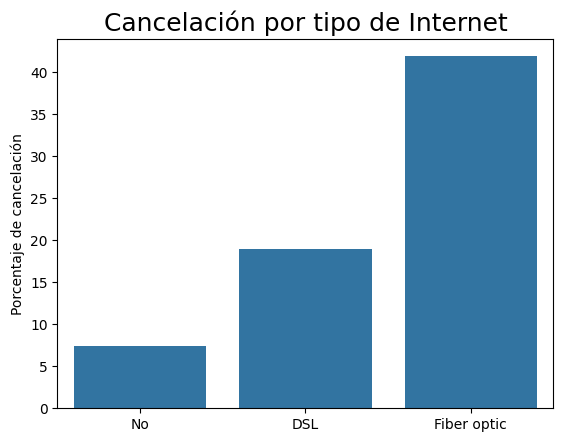

In [80]:
orden = df.groupby('servicio_internet')['cancelo'].mean().sort_values().index
sns.barplot(x='servicio_internet', y='cancelo', data=df, estimator=lambda x: x.mean()*100, order=orden, errorbar=None)
plt.xlabel('')
plt.ylabel('Porcentaje de cancelación')
plt.title('Cancelación por tipo de Internet', fontsize=18)
plt.show()

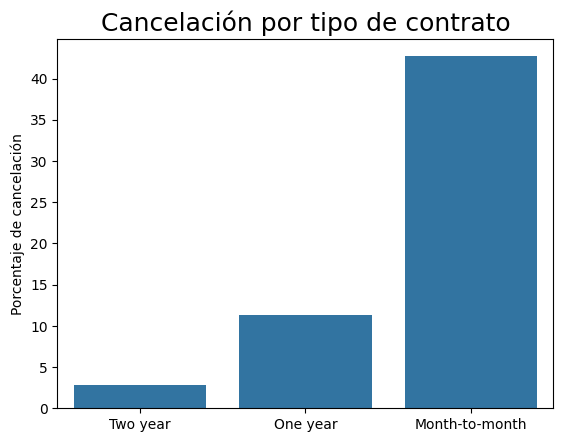

In [81]:
orden = df.groupby('tipo_contrato')['cancelo'].mean().sort_values().index
sns.barplot(x='tipo_contrato', y='cancelo', data=df, estimator=lambda x: x.mean()*100, order=orden, errorbar=None)
plt.xlabel('')
plt.ylabel('Porcentaje de cancelación')
plt.title('Cancelación por tipo de contrato', fontsize=18)
plt.show()

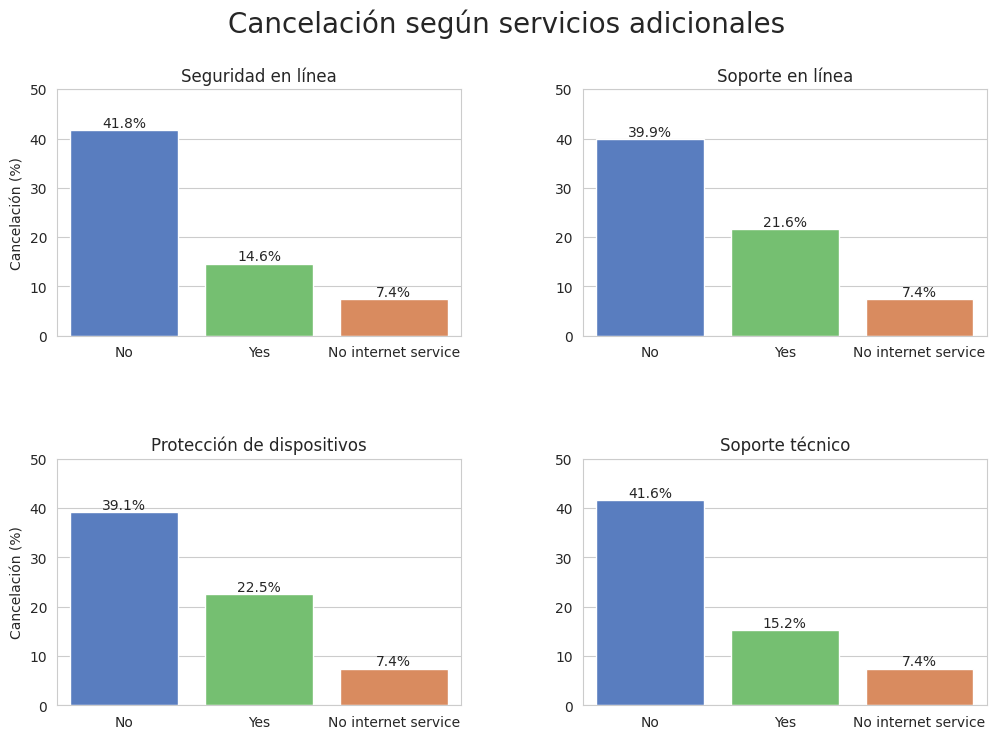

In [82]:
# Estilo visual
sns.set_style("whitegrid")

# Lista de servicios adicionales
servicios = ['seguridad_en_linea', 'Soporte_en_linea', 'proteccion_dispositivos', 'soporte_tecnico']
titulos = ['Seguridad en línea', 'Soporte en línea', 'Protección de dispositivos', 'Soporte técnico']

# Orden lógico de categorías
orden =  ['No', 'Yes', 'No internet service']

# Crear figura y ejes
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Cancelación según servicios adicionales', fontsize=20)

# Gráficas
for i, (servicio, titulo) in enumerate(zip(servicios, titulos)):
    fila = i // 2
    col = i % 2
    ax = axs[fila, col]

    # Gráfica de barras con orden y sin error bars
    plot = sns.barplot(
        x=servicio, y='cancelo', data=df,
        estimator=lambda x: x.mean() * 100,
        order=orden, errorbar=None, hue=servicio, legend=False,
        ax=ax, palette='muted'
    )

    # Título
    ax.set_title(titulo)

    # Etiqueta del eje Y solo en la primera columna
    if col == 0:
        ax.set_ylabel('Cancelación (%)')
    else:
        ax.set_ylabel('')

    # Quitar etiqueta del eje X
    ax.set_xlabel('')

    # Rango común para comparar
    ax.set_ylim(0, 50)

    # Etiquetas sobre las barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')

plt.show()


In [83]:
# Realizar recuentos cruzados con cancelo
variables_binarias = ['mayor_de_65', 'tiene_pareja', 'tiene_dependentes']

for col in variables_binarias:
    print(f'\n--- Porcentaje de evasión por {col} ---')
    porcentaje = pd.crosstab(df[col], df['cancelo'], normalize='index') * 100
    print(porcentaje.round(2))


--- Porcentaje de evasión por mayor_de_65 ---
cancelo          0      1
mayor_de_65              
0            76.35  23.65
1            58.32  41.68

--- Porcentaje de evasión por tiene_pareja ---
cancelo           0      1
tiene_pareja              
0             67.02  32.98
1             80.28  19.72

--- Porcentaje de evasión por tiene_dependentes ---
cancelo                0      1
tiene_dependentes              
0                  68.72  31.28
1                  84.47  15.53


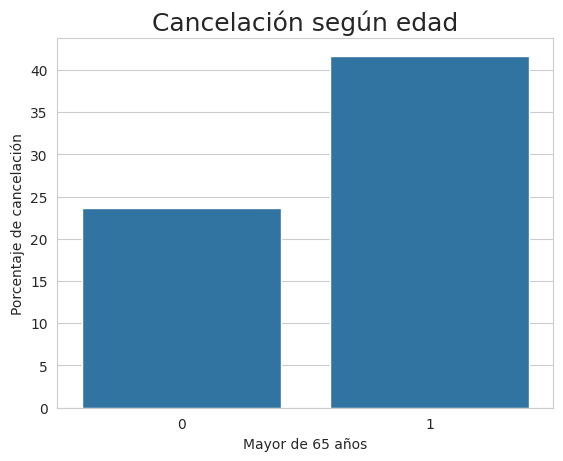

In [84]:
orden = df.groupby('mayor_de_65')['cancelo'].mean().sort_values().index
sns.barplot(x='mayor_de_65', y='cancelo', data=df, estimator=lambda x: x.mean()*100, order=orden, errorbar=None)
plt.xlabel('Mayor de 65 años')
plt.ylabel('Porcentaje de cancelación')
plt.title('Cancelación según edad', fontsize=18)
plt.show()

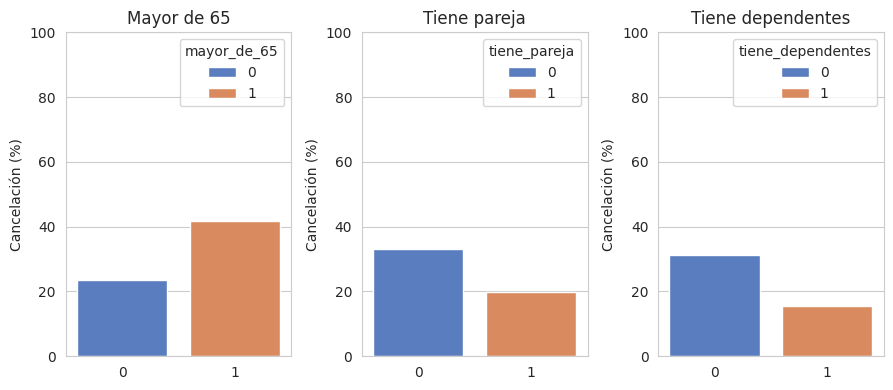

In [85]:
plt.figure(figsize=(12,4))

# Gráficas de barras para variables binarias
for i, var in enumerate(variables_binarias):
    plt.subplot(1, 4, i+1)
    data = df.groupby(var)['cancelo'].mean() * 100
    sns.barplot(x=data.index, y=data.values, hue=data.index, palette='muted')

    plt.ylim(0, 100)
    plt.title(var.replace('_', ' ').capitalize())
    plt.ylabel('Cancelación (%)')
    plt.xlabel('')


plt.tight_layout()
plt.show()


## 17.Conteo de evasión por variables numéricas

In [86]:
# Variables numericas

columnas_numericas = [['gastos_mensuales','gastos_totales','cuentas_diarias']]

# Promedios y desviaciones por grupo
df.groupby('cancelo')[['gastos_mensuales', 'gastos_totales', 'cuentas_diarias']].agg(['mean', 'std'])


gastos_mensuales            gastos_totales               \
                    mean        std           mean          std   
cancelo                                                           
0              61.307408  31.094557    2555.344141  2329.456984   
1              74.441332  24.666053    1531.796094  1890.822994   

        cuentas_diarias            
                   mean       std  
cancelo                            
0              2.043580  1.036485  
1              2.481378  0.822202

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 7032 and the vector passed to `y` has length 3.

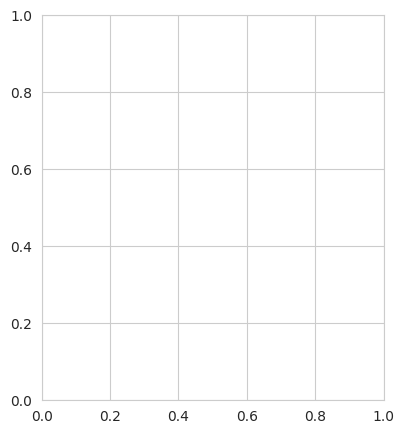

In [87]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(columnas_numericas):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='cancelo', y=col, data=df,showfliers=False)
    plt.title(f'{col} según cancelación')
    plt.xlabel('Canceló')
    plt.ylabel(col.replace('_', ' ').capitalize())

plt.tight_layout()
plt.show()


In [ ]:
# Esto sugiere que a mayor gasto mensual, mayor probabilidad de cancelación, posiblemente porque sienten que el servicio es muy costoso.
# Los que cancelaron (1) tienen un total mucho menor, lo que indica que se fueron temprano, es decir, llevaban poco tiempo con el servicio.
# Los clientes que cancelaron (1) tienden a tener ligeramente más cuentas diarias que los que no cancelaron. Aunque no hay una diferencia tan marcada, puede indicar que los que se van usaban más el servicio, pero algo no los convenció a largo plazo.

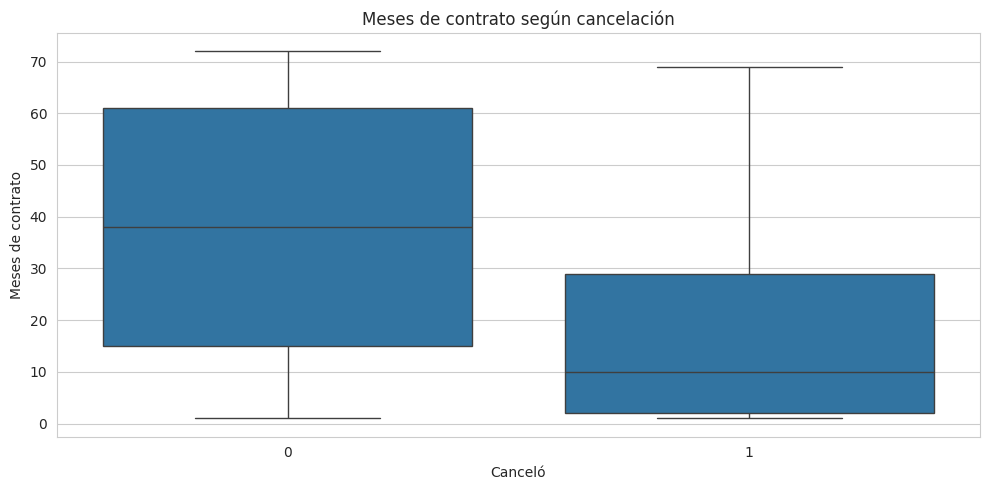

In [88]:
# Boxplot para meses de contrato
plt.figure(figsize=(10, 5))
sns.boxplot(x='cancelo', y='meses_de_contrato', data=df, showfliers=False)
plt.title('Meses de contrato según cancelación')
plt.xlabel('Canceló')
plt.ylabel('Meses de contrato')

plt.tight_layout()
plt.show()

# **📄Informe final**